In [1]:
import torch # 사용안하면 run all cells하다가 마지막에 리스타트 오류남.

In [2]:
# 사용안하면 run all cells하다가 마지막에 리스타트 오류남.
# CPU 에서 GPU 활성 하기
if torch.cuda.is_available():
    device = torch.device("cuda") # 목적지가 cuda device에 설정된다.
    print("CUDA(GPU)를 사용합니다.")
else:
    device = torch.device("cpu")
    print("CUDA(GPU)를 사용할 수 없으므로, cpu를 사용합니다.")

CUDA(GPU)를 사용합니다.


In [ ]:
# 1번 제외 하고 2번에서 

In [24]:
# 패키지 사용
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('./encoded_data.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_1772\3691594242.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./encoded_data.csv')


In [26]:
# change_date 열을 제외한 나머지 열 선택
X = df.drop(columns=['change_date']).values
y = df['change_date'].values # 예측값

In [27]:
X.shape # ( 행, 열 확인 )

(6476, 291)

In [36]:
X.shape[1]

291

In [28]:
len(df.columns) # 총 특성 갯수 292
df['change_date']

0       25
1       25
2       25
3       25
4       25
        ..
6471    27
6472    27
6473    27
6474    27
6475    27
Name: change_date, Length: 6476, dtype: int64

In [29]:
# 모델 linear 기본선형회귀 사용
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=291, activation='relu'), # 입력계층 특성 292개중에 291개(input_dim)사용
    tf.keras.layers.Dense(64, activation='relu'), # 은닉계층1 32개 
    tf.keras.layers.Dense(32, activation='relu'), # 은닉계층2 32개
    tf.keras.layers.Dense(16, activation='relu'), # 은닉계층3 64개
    tf.keras.layers.Dense(1, activation='linear') # 출력계층 Age특성 한개, linear(회귀) 활성화 함수 사용
])

# 회귀를 위한 손실 함수(mean squared error)와 메트릭스(mean absolute error) 사용하여 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# 모델 정보(요약) 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               37376     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,257
Trainable params: 48,257
Non-trainable params: 0
_________________________________________________________________


In [30]:
# '-' 하이픈 들어가 있는 부분은 nan값으로 처리.
X[X == '-'] = np.nan

In [31]:
X

array([['11', '11', '11', ..., False, True, False],
       ['11', '11', '11', ..., False, True, False],
       ['11', '11', '11', ..., False, True, False],
       ...,
       [nan, nan, nan, ..., False, False, False],
       [nan, nan, nan, ..., False, False, False],
       [nan, nan, nan, ..., False, False, False]], dtype=object)

In [32]:
X = X.astype(np.float32)  # X를 float32 타입으로 변환
y = y.astype(np.float32)

# print(np.isnan(X).any())  # X에 결측치가 있는지 확인
# print(np.isnan(y).any())  # y에 결측치가 있는지 확인

In [33]:
# 시드 값 생성
seed = 123

# TensorFlow와 NumPy에서 난수 생성기의 시드를 설정하여 결과의 재현성을 보장
tf.random.set_seed(seed)
np.random.seed(seed)

history = model.fit(X, y, epochs=100, batch_size=100) # (입력값, 타겟값, 훈련횟수 100번, 훈련에사용할 데이터수 12개)

Epoch 1/100
65/65 [==============================] - 0s 2ms/step - loss: 546.2852 - mean_absolute_error: 22.7744
Epoch 2/100
65/65 [==============================] - 0s 1ms/step - loss: 462.5391 - mean_absolute_error: 21.0663
Epoch 3/100
65/65 [==============================] - 0s 1ms/step - loss: 268.2605 - mean_absolute_error: 15.5928
Epoch 4/100
65/65 [==============================] - 0s 1ms/step - loss: 46.7686 - mean_absolute_error: 5.4652
Epoch 5/100
65/65 [==============================] - 0s 1ms/step - loss: 18.1770 - mean_absolute_error: 3.7269
Epoch 6/100
65/65 [==============================] - 0s 1ms/step - loss: 18.1667 - mean_absolute_error: 3.7223
Epoch 7/100
65/65 [==============================] - 0s 1ms/step - loss: 18.1677 - mean_absolute_error: 3.7216
Epoch 8/100
65/65 [==============================] - 0s 1ms/step - loss: 18.1638 - mean_absolute_error: 3.7192
Epoch 9/100
65/65 [==============================] - 0s 1ms/step - loss: 18.1662 - mean_absolute_error: 3.

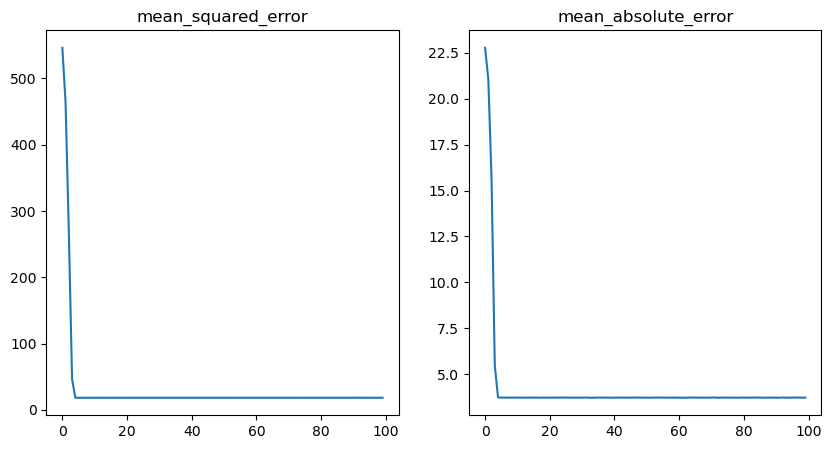

In [34]:
plt.figure(figsize=(10,5))


# subplot 1 : Mean Squared Error 손실 함수의 변화
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('mean_squared_error')


# subplot 2 : Mean Absolute Error 매트릭스의 변화
plt.subplot(1,2,2)
plt.plot(history.history['mean_absolute_error'])
plt.title('mean_absolute_error')

plt.show()

In [35]:
# 손실 함수와 평균 절대 오차 값을 가져오기
loss_values = history.history['loss']
mean_absolute_error_values = history.history['mean_absolute_error']
mean_absolute_error_values = history.history['mean_absolute_error'] # 결정계수 r^2 

# 에포크 수
epochs = len(loss_values)

# 결과 출력
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}: Loss (MSE) = {loss_values[epoch]:.4f}, MAE = {mean_absolute_error_values[epoch]:.4f}")

Epoch 1: Loss (MSE) = 546.2852, MAE = 22.7744
Epoch 2: Loss (MSE) = 462.5391, MAE = 21.0663
Epoch 3: Loss (MSE) = 268.2605, MAE = 15.5928
Epoch 4: Loss (MSE) = 46.7686, MAE = 5.4652
Epoch 5: Loss (MSE) = 18.1770, MAE = 3.7269
Epoch 6: Loss (MSE) = 18.1667, MAE = 3.7223
Epoch 7: Loss (MSE) = 18.1677, MAE = 3.7216
Epoch 8: Loss (MSE) = 18.1638, MAE = 3.7192
Epoch 9: Loss (MSE) = 18.1662, MAE = 3.7207
Epoch 10: Loss (MSE) = 18.1652, MAE = 3.7193
Epoch 11: Loss (MSE) = 18.1683, MAE = 3.7237
Epoch 12: Loss (MSE) = 18.1827, MAE = 3.7180
Epoch 13: Loss (MSE) = 18.1659, MAE = 3.7194
Epoch 14: Loss (MSE) = 18.1656, MAE = 3.7189
Epoch 15: Loss (MSE) = 18.1679, MAE = 3.7219
Epoch 16: Loss (MSE) = 18.1649, MAE = 3.7209
Epoch 17: Loss (MSE) = 18.1703, MAE = 3.7219
Epoch 18: Loss (MSE) = 18.1826, MAE = 3.7159
Epoch 19: Loss (MSE) = 18.1726, MAE = 3.7218
Epoch 20: Loss (MSE) = 18.1663, MAE = 3.7189
Epoch 21: Loss (MSE) = 18.1706, MAE = 3.7207
Epoch 22: Loss (MSE) = 18.1715, MAE = 3.7200
Epoch 23: Los